In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dataset.csv')
data

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48
...,...,...,...,...
35712,Shopping,1920,1517,2016-12-19 14:30:33
35713,Shopping,1920,1487,2016-12-19 15:03:34
35714,Shopping,1920,1432,2016-12-19 15:29:33
35715,Shopping,1920,1321,2016-12-19 16:03:35


In [4]:
columns = data.columns

选取5个停车场

In [11]:
targetList = ['BHMBCCMKT01', 'BHMMBMMBX01', 'BHMNCPHST01', 'BHMNCPNST01', 'BHMBCCTHL01']

In [15]:
newdata = data[data[columns[0]].isin(targetList)].copy()
newdata

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48
...,...,...,...,...
17689,BHMNCPNST01,485,297,2016-12-19 14:30:33
17690,BHMNCPNST01,485,303,2016-12-19 15:03:34
17691,BHMNCPNST01,485,298,2016-12-19 15:29:33
17692,BHMNCPNST01,485,272,2016-12-19 16:03:35


In [30]:
newdata.shape

(6560, 4)

In [27]:
# 小时
newdata[columns[3]].iloc[0][11:13]

'07'

In [28]:
# 分钟
newdata[columns[3]].iloc[0][14:16]

'59'

In [29]:
# 秒
newdata[columns[3]].iloc[0][-2:]

'42'

In [35]:
t = []
for i in range(newdata.shape[0]):
    h = int(newdata[columns[3]].iloc[i][11:13])
    m = int(newdata[columns[3]].iloc[i][14:16])
    s = int(newdata[columns[3]].iloc[i][-2:])
    if h < 8:
        t.append(0)
    else:
        _t = (h - 8) * 60 * 60 + m * 60 + s
        t.append(_t)
t

[0,
 1542,
 3582,
 5566,
 7188,
 8809,
 10788,
 12347,
 14384,
 16185,
 18168,
 19785,
 21767,
 23389,
 25033,
 27014,
 29052,
 30674,
 0,
 1815,
 3859,
 5415,
 7455,
 9017,
 11059,
 12618,
 14654,
 16216,
 17835,
 19819,
 21440,
 23417,
 25039,
 27015,
 29058,
 30617,
 0,
 1820,
 3442,
 5420,
 7400,
 9020,
 10640,
 12622,
 14664,
 16224,
 17841,
 19821,
 21442,
 23423,
 25462,
 27082,
 29063,
 30627,
 207,
 1827,
 3853,
 5427,
 7047,
 9027,
 10650,
 12628,
 14609,
 16228,
 18268,
 19829,
 21808,
 23432,
 25470,
 27032,
 28651,
 30629,
 0,
 1837,
 3454,
 5437,
 7474,
 9034,
 10654,
 12638,
 14674,
 16236,
 18279,
 19836,
 21818,
 23435,
 25061,
 27039,
 29079,
 30642,
 280,
 1845,
 3886,
 5445,
 7061,
 9043,
 11084,
 12641,
 14266,
 16241,
 18283,
 19842,
 21822,
 23442,
 25484,
 27046,
 29023,
 30643,
 287,
 1847,
 3887,
 5449,
 7428,
 9048,
 10672,
 12648,
 14269,
 16248,
 18289,
 19849,
 21829,
 23449,
 25074,
 27049,
 28675,
 30649,
 297,
 1854,
 3476,
 5455,
 7079,
 9054,
 10675,


In [37]:
newdata['Occupancy'].iloc[195]

161

In [39]:
t[195]

26828

In [42]:
import numpy as np
C=np.zeros(newdata.shape[0])
C

array([0., 0., 0., ..., 0., 0., 0.])

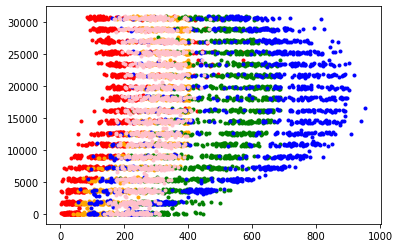

In [47]:
import matplotlib.pyplot as plt
for i in range(newdata.shape[0]):
    if newdata[columns[0]].iloc[i]==targetList[0]:
        plt.plot(newdata[columns[2]].iloc[i], t[i], 'r.')
    elif newdata[columns[0]].iloc[i]==targetList[1]:
        plt.plot(newdata[columns[2]].iloc[i], t[i], 'g.')
    elif newdata[columns[0]].iloc[i]==targetList[2]:
        plt.plot(newdata[columns[2]].iloc[i], t[i], 'b.')
    elif newdata[columns[0]].iloc[i]==targetList[3]:
        plt.plot(newdata[columns[2]].iloc[i], t[i], color='pink', marker='.')
    elif newdata[columns[0]].iloc[i]==targetList[4]:
        plt.plot(newdata[columns[2]].iloc[i], t[i], color='orange', marker='.')

In [46]:
plt.show()